In [136]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [137]:
#list_of_tickers = ["MJ", 'SPY']
#end_date= datetime.now()
#start_date= end_date + timedelta(-365)
#tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close')
#tickers_df.head()

In [138]:
#read aggregate data csv
aggregate_df= pd.read_csv("aggregate_data.csv")
aggregate_df.set_index(pd.to_datetime(aggregate_df['date'], infer_datetime_format=True), inplace=True)
aggregate_df.drop(columns=['date'], inplace=True)
aggregate_df.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2019-09-21 16:00:00,102.44,59.58,24.59,82.79,37.30,300.16
2019-09-16 00:00:00,102.44,59.58,24.59,83.86,37.64,300.16
2019-09-13 00:00:00,103.16,60.09,25.22,82.42,37.31,301.09
2019-09-12 00:00:00,103.86,62.18,25.08,82.63,37.37,301.29
2019-09-11 00:00:00,102.83,62.38,25.71,83.38,37.60,300.25


In [139]:
#tickers_df.to_csv("MJ_index_data")

In [140]:
#tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
#tickers_df.head()

In [141]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = aggregate_df.pct_change().dropna()
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2019-09-16,0.000000,0.000000,0.000000,0.012924,0.009115,0.000000
2019-09-13,0.007029,0.008560,0.025620,-0.017171,-0.008767,0.003098
2019-09-12,0.006786,0.034781,-0.005551,0.002548,0.001608,0.000664
2019-09-11,-0.009917,0.003216,0.025120,0.009077,0.006155,-0.003452
2019-09-10,-0.001750,-0.008496,-0.008557,-0.019789,-0.017287,-0.007061


In [173]:
# Calculate Sharpe Ratio
sharpe_ratios = (df_daily_returns.mean() * 252) / (df_daily_returns.std() * np.sqrt(252))
sharpe_ratios

BOOZ   -0.012977
SMOK    0.639216
MJ      0.346537
XBI    -0.128937
XPH     0.443363
SPY    -0.818244
dtype: float64

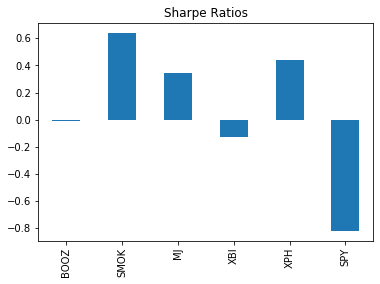

In [174]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

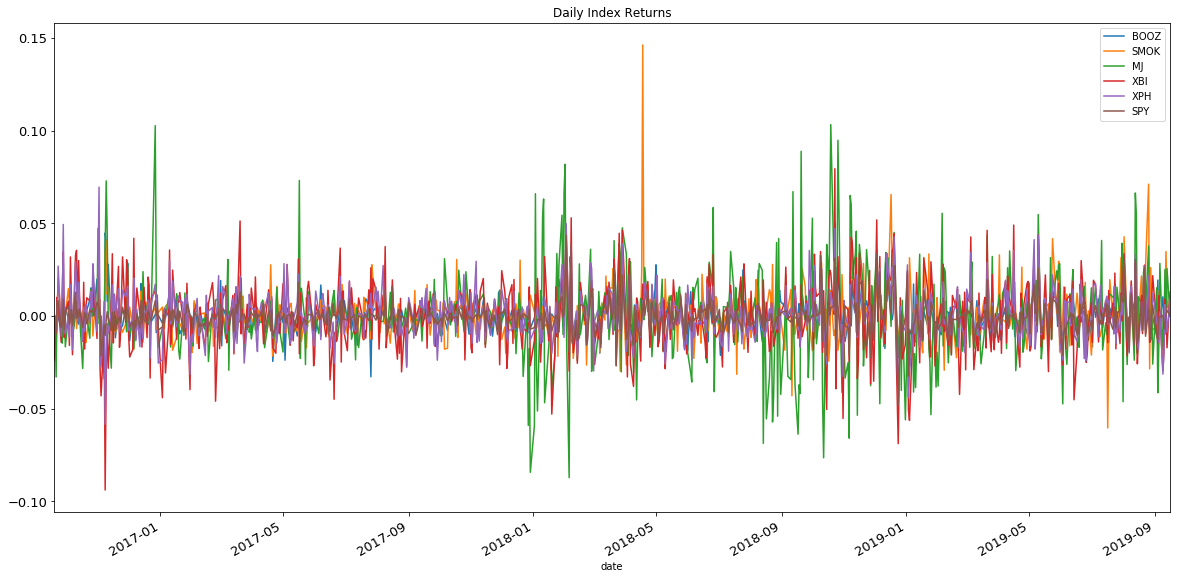

In [142]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(20,10), title= "Daily Index Returns", fontsize=13);

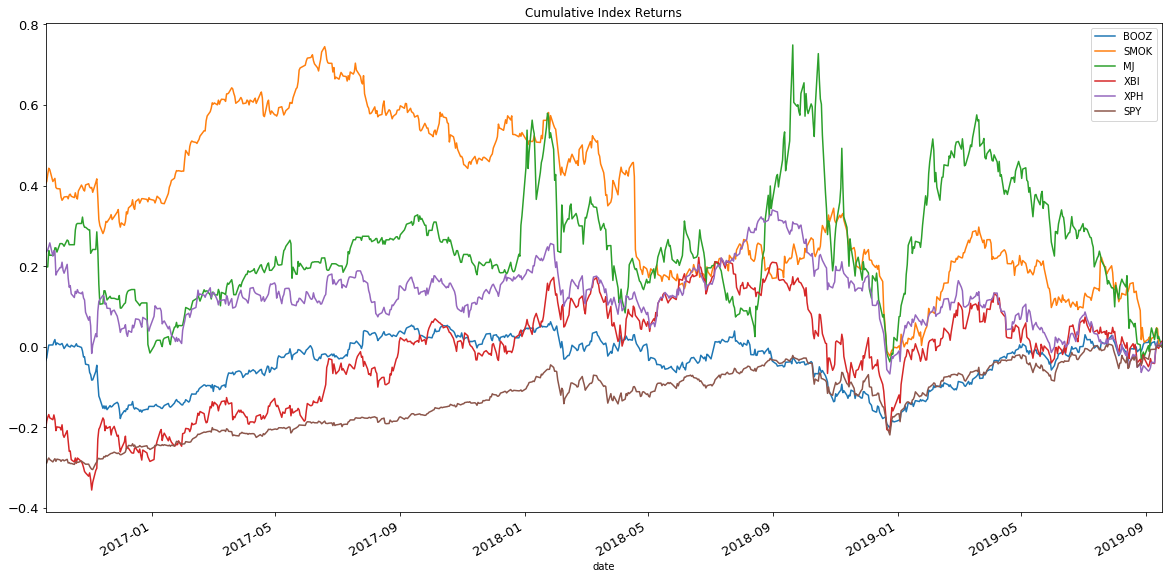

In [143]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);


In [144]:
#HV plot of cumulative returns
cumulative_returns_indexes.hvplot.line(ylabel= "cumulative returns", xlabel= "date")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [145]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

SMOK    0.192993
MJ      0.139916
XBI     0.130027
SPY     0.079362
XPH     0.076618
BOOZ    0.061470
dtype: float64

In [146]:
annualized_std_indexes = indexes_daily_std * np.sqrt(252)
annualized_std_indexes

BOOZ    0.975811
SMOK    3.063666
MJ      2.221094
XBI     2.064110
XPH     1.216272
SPY     1.259834
dtype: float64

In [147]:
correlation= aggregate_df.corr()
correlation

,BOOZ,SMOK,MJ,XBI,XPH,SPY
BOOZ,1.000000,0.305083,0.218449,0.453539,0.275505,0.318264
SMOK,0.305083,1.000000,-0.041690,-0.334894,0.279037,-0.562516
MJ,0.218449,-0.041690,1.000000,0.451009,0.414439,0.393592
XBI,0.453539,-0.334894,0.451009,1.000000,0.423882,0.831621
XPH,0.275505,0.279037,0.414439,0.423882,1.000000,0.073947
SPY,0.318264,-0.562516,0.393592,0.831621,0.073947,1.000000


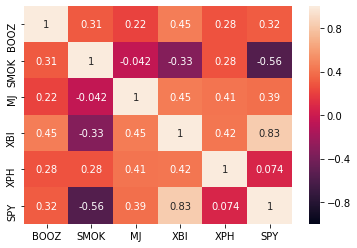

In [148]:
#Correlation heat map
import seaborn as sns
corr_all = aggregate_df.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns.values, vmin=-1, vmax=1,
            yticklabels=corr_all.columns.values, annot= True)

In [149]:
#daily returns pct change
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2019-09-16,0.000000,0.000000,0.000000,0.012924,0.009115,0.000000
2019-09-13,0.007029,0.008560,0.025620,-0.017171,-0.008767,0.003098
2019-09-12,0.006786,0.034781,-0.005551,0.002548,0.001608,0.000664
2019-09-11,-0.009917,0.003216,0.025120,0.009077,0.006155,-0.003452
2019-09-10,-0.001750,-0.008496,-0.008557,-0.019789,-0.017287,-0.007061


# Calculate Volatility

In [150]:
#annualized volatility
volatility = df_daily_returns.std() * np.sqrt(252)
volatility

BOOZ    0.141926
SMOK    0.212611
MJ      0.352232
XBI     0.282658
XPH     0.205717
SPY     0.129308
dtype: float64

In [151]:
#calculate average daily returns of each index
avg_daily_return_booz = df_daily_returns.mean()['BOOZ']
avg_daily_return_smok = df_daily_returns.mean()['SMOK']
avg_daily_return_mj = df_daily_returns.mean()['MJ']
avg_daily_return_xbi = df_daily_returns.mean()['XBI']
avg_daily_return_xph = df_daily_returns.mean()['XPH']
avg_daily_return_spy = df_daily_returns.mean()['SPY']
print("BOOZ average daily return is", avg_daily_return_booz)
print("SMOK average daily return is", avg_daily_return_smok)
print("MJ average daily return is", avg_daily_return_mj)
print("XBI average daily return is", avg_daily_return_xbi)
print("XPI average daily return is", avg_daily_return_xph)
print("SPY average daily return is", avg_daily_return_spy)

BOOZ average daily return is -7.308434562164279e-06
SMOK average daily return is 0.0005393045878939412
MJ average daily return is 0.0004843718668027893
XBI average daily return is -0.00014462284116596936
XPI average daily return is 0.00036193342635836294
SPY average daily return is -0.0004198624440560158


In [152]:
#calculate daily std dev of indexes
std_dev_daily_return_booz = df_daily_returns.std()['BOOZ']
std_dev_daily_return_smok = df_daily_returns.std()['SMOK']
std_dev_daily_return_mj = df_daily_returns.std()['MJ']
std_dev_daily_return_xbi = df_daily_returns.std()['XBI']
std_dev_daily_return_xph = df_daily_returns.std()['XPH']
std_dev_daily_return_spy = df_daily_returns.std()['SPY']
print("BOOZ volatility is", std_dev_daily_return_booz)
print("SMOK volatility is", std_dev_daily_return_smok)
print("MJ volatility is", std_dev_daily_return_mj)
print("XBI volatility is", std_dev_daily_return_xbi)
print("XPH volatility is", std_dev_daily_return_xph)
print("SPY volatility is", std_dev_daily_return_spy)


BOOZ volatility is 0.008940512330015464
SMOK volatility is 0.013393263709435912
MJ volatility is 0.0221885516416437
XBI volatility is 0.017805790484252817
XPH volatility is 0.012958934387003922
SPY volatility is 0.008145624768022474


In [153]:
#show the final closigprices
booz_last_price = aggregate_df['BOOZ'][0]
smok_last_price = aggregate_df['SMOK'][0]
mj_last_price = aggregate_df['MJ'][0]
xbi_last_price = aggregate_df['XBI'][0]
xph_last_price = aggregate_df['XPH'][0]
spy_last_price = aggregate_df['SPY'][0]
print(booz_last_price)
print(smok_last_price)
print(mj_last_price)
print(xbi_last_price)
print(xph_last_price)
print(spy_last_price)

102.44
59.58
24.59
82.79
37.3
300.16


In [154]:
# Setup the Monte Carlo Parameters 500msimulations over 10 years
number_simulations = 500
number_records = 252 * 10
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [155]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]
    simulated_booz_prices = [booz_last_price]
    #simulated_smok_prices = [smok_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        simulated_booz_price = simulated_booz_prices[-1] * (1 + np.random.normal(avg_daily_return_booz, std_dev_daily_return_booz))
        #simulated_smok_price = simulated_smok_prices[-1] * (1 + np.random.normal(avg_daily_return_smok, std_dev_daily_return_smok))
       
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
        simulated_booz_prices.append(simulated_booz_price)
        #simulated_smok_prices.append(simulated_smok_price)
    
        
    monte_carlo["MJ prices"] = pd.Series(simulated_mj_prices)
    monte_carlo["BOOZ prices"] = pd.Series(simulated_booz_prices)
    #monte_carlo["SMOK prices"] = pd.Series(simulated_smok_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights50/50
    weight = [.5, .5]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2516,1.229286,1.924990,2.037945,1.614990,3.148874,1.462100,1.255686,1.222560,3.003163,1.475028,...,8.027809,4.828345,3.744760,1.317556,2.467581,1.665034,1.078283,0.932269,4.219036,1.507755
2517,1.228249,1.942407,2.044014,1.601212,3.156864,1.440706,1.269776,1.197539,2.968068,1.435071,...,8.005995,4.819037,3.764699,1.334238,2.449542,1.669110,1.101984,0.951082,4.156464,1.535557
2518,1.211433,1.927236,2.083086,1.590591,3.144875,1.428384,1.270781,1.190403,2.989288,1.403272,...,7.991775,4.835457,3.750486,1.331737,2.438632,1.699340,1.097441,0.960844,4.167006,1.530091
2519,1.219964,1.907256,2.079650,1.604786,3.155911,1.432570,1.269026,1.204912,3.018131,1.409071,...,7.888911,4.980442,3.708911,1.336489,2.375669,1.717426,1.084270,0.955376,4.189190,1.500170
2520,1.238794,1.886789,2.055326,1.589644,3.163723,1.397083,1.276430,1.203313,2.995450,1.436063,...,8.071742,5.077313,3.687281,1.351768,2.456073,1.677021,1.089844,0.945790,4.260851,1.486210


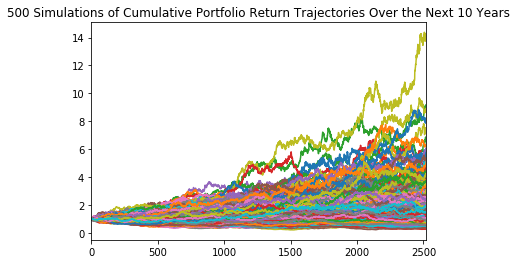

In [156]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 10 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [172]:
sharpe_ratios = (aggregate_df.mean() * 252) / (aggregate_df.std() * np.sqrt(252))
sharpe_ratios

BOOZ    248.721516
SMOK    111.207690
MJ      141.647634
XBI     120.009081
XPH     232.411080
SPY     174.042689
dtype: float64

In [ ]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### MJ INDEX Monte Carlo simulation

In [157]:
# Monte carlo for MJ index 500 simulations in 10 years

mj_sim_df= pd.DataFrame()

for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices_index = [mj_last_price]

    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        mj_sim_price = simulated_mj_prices_index[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
        simulated_mj_prices_index.append(mj_sim_price)
    
    # Create a DataFrame of the simulated prices
    #simulated_price_df = pd.DataFrame({
        #"Simulated MJ Prices": simulated_mj_prices
        #})

    # Print head of DataFrame
    mj_sim_df[f"Simulation {n+1}"]= pd.Series(simulated_mj_prices_index)
mj_sim_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,...,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000
1,24.865959,24.151857,24.607892,23.682649,24.938045,25.296179,24.128644,23.223963,24.070855,24.179993,...,24.510887,24.233563,24.437041,25.006627,23.928469,23.894438,24.509159,24.630734,24.831628,24.222246
2,25.130436,23.777972,25.683063,23.656551,24.931179,25.748217,24.336226,22.972534,24.391176,24.713751,...,24.295487,23.506660,24.425695,24.446827,24.582973,24.043973,24.536489,25.132398,25.496589,23.559445
3,25.178139,23.591825,26.005883,23.827298,24.705078,25.999501,23.466474,23.606825,24.093277,25.070138,...,23.815823,23.528745,23.911977,24.495404,24.691821,25.127985,25.380062,24.212011,25.695818,24.350437
4,24.371370,23.242589,25.047869,23.140773,24.763441,25.640036,24.159812,23.137240,23.041300,24.981967,...,24.116320,23.450592,23.360780,24.460127,24.758510,26.208257,27.046049,24.075416,26.265792,24.350123


In [158]:
print(std_dev_daily_return_mj)

0.0221885516416437


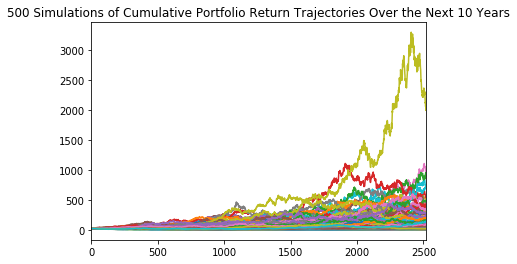

In [165]:
#Simulated stock price trajectory for MJ
plot_title_mj = f"{n+1} Simulations of MJ Cumulative Portfolio Return Trajectories Over the Next 10 Years"
mj_sim_df.plot(legend=None, title=plot_title)

In [168]:
#Daily returs of simulated stock price
simulated_mj_daily_returns = mj_sim_df.pct_change()
simulated_mj_daily_returns.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011222,-0.017818,0.000728,-0.036899,0.014154,0.028718,-0.018762,-0.055553,-0.021112,-0.016674,...,-0.003217,-0.014495,-0.006220,0.016943,-0.026902,-0.028286,-0.003288,0.001657,0.009826,-0.014955
2,0.010636,-0.015481,0.043692,-0.001102,-0.000275,0.017870,0.008603,-0.010826,0.013307,0.022074,...,-0.008788,-0.029996,-0.000464,-0.022386,0.027353,0.006258,0.001115,0.020367,0.026779,-0.027363
3,0.001898,-0.007829,0.012569,0.007218,-0.009069,0.009759,-0.035739,0.027611,-0.012213,0.014421,...,-0.019743,0.000939,-0.021032,0.001987,0.004428,0.045085,0.034380,-0.036622,0.007814,0.033574
4,-0.032042,-0.014803,-0.036838,-0.028813,0.002362,-0.013826,0.029546,-0.019892,-0.043663,-0.003517,...,0.012618,-0.003322,-0.023051,-0.001440,0.002701,0.042991,0.065642,-0.005642,0.022182,-0.000013


In [169]:
#cumulative returns of simulated MJ stock prices
simulated_mj_cumulative_returns = (1 + mj_sim_df).cumprod()
simulated_mj_cumulative_returns.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,...,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01,2.559000e+01
1,6.619099e+02,6.436360e+02,6.553060e+02,6.316290e+02,6.637546e+02,6.729192e+02,6.430420e+02,6.198912e+02,6.415632e+02,6.443560e+02,...,6.528236e+02,6.457269e+02,6.509339e+02,6.655096e+02,6.379195e+02,6.370487e+02,6.527794e+02,6.558905e+02,6.610314e+02,6.454373e+02
2,1.729599e+04,1.594800e+04,1.748557e+04,1.557379e+04,1.721194e+04,1.799939e+04,1.629226e+04,1.486036e+04,1.629004e+04,1.656881e+04,...,1.651349e+04,1.582461e+04,1.655045e+04,1.693511e+04,1.631988e+04,1.595423e+04,1.666969e+04,1.713999e+04,1.751508e+04,1.585158e+04
3,4.527769e+05,3.921903e+05,4.722133e+05,3.866552e+05,4.424342e+05,4.859745e+05,3.986141e+05,3.656663e+05,4.087706e+05,4.319512e+05,...,4.097959e+05,3.881578e+05,4.123043e+05,4.317674e+05,4.192874e+05,4.168519e+05,4.397475e+05,4.321336e+05,4.675793e+05,4.018445e+05
4,1.148757e+07,9.507709e+06,1.230015e+07,9.334155e+06,1.139863e+07,1.294638e+07,1.002906e+07,8.826177e+06,9.827376e+06,1.122294e+07,...,1.029256e+07,9.490688e+06,1.004406e+07,1.099285e+07,1.080022e+07,1.134181e+07,1.233318e+07,1.083593e+07,1.274892e+07,1.018681e+07



### Calculate the Cumulative Profits/Losses of Simulated Stock Prices for MJ Index

In [170]:
# Multiply an initial investment of 10,000 by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
initial_investment = 10000
cumulative_pnl = initial_investment * mj_sim_df
cumulative_pnl.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,...,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000,245900.000000
1,248659.592213,241518.570790,246078.920871,236826.493922,249380.446244,252961.794363,241286.435967,232239.626762,240708.546919,241799.933873,...,245108.870264,242335.627190,244370.405805,250066.273822,239284.686784,238944.378143,245091.593514,246307.342803,248316.283507,242222.464148
2,251304.363062,237779.718030,256830.634995,236565.511086,249311.793292,257482.166255,243362.264377,229725.336959,243911.763349,247137.514108,...,242954.867950,235066.603203,244256.954945,244468.270774,245829.730179,240439.732463,245364.887724,251323.980562,254965.888235,235594.452681
3,251781.392353,235918.250842,260058.834535,238272.983551,247050.783551,259995.007276,234664.740639,236068.249719,240932.771754,250701.380921,...,238158.230372,235287.445387,239119.774188,244954.044754,246918.213860,251279.851449,253800.619899,242120.107765,256958.184522,243504.374054
4,243713.703634,232425.891312,250478.693472,231407.732563,247634.412423,256400.364635,241598.115366,231372.403874,230412.996124,249819.668943,...,241163.201179,234505.924624,233607.801815,244601.270951,247585.095497,262082.572792,270460.494062,240754.159173,262657.921091,243501.234320


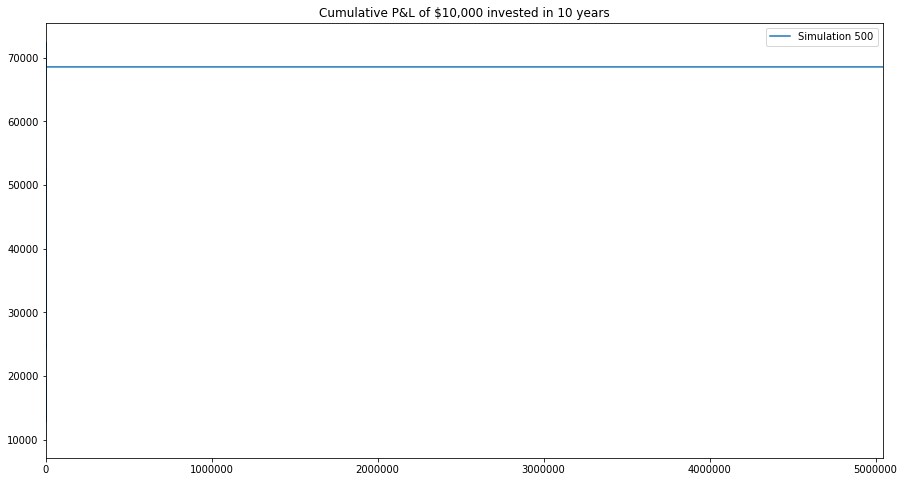

In [163]:
cumulative_pnl.plot(figsize= (15,8), title= "Cumulative P&L of $10,000 invested in 10 years")

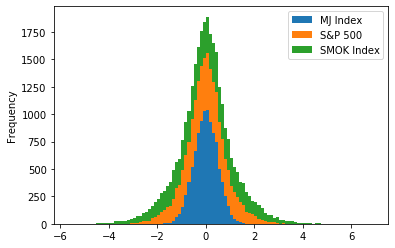

In [164]:
std_dev_daily_return_mj = np.random.normal(scale=0.5, size=10000)
std_dev_daily_return_spy = np.random.normal(scale=1.0, size=10000)
std_dev_daily_return_smok = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "MJ Index": std_dev_daily_return_mj,
    "S&P 500": std_dev_daily_return_spy,
    "SMOK Index": std_dev_daily_return_smok
})

portfolio_std.plot.hist(stacked=True, bins=100)